In [114]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-sales-forecast/features.csv
/kaggle/input/walmart-sales-forecast/stores.csv
/kaggle/input/walmart-sales-forecast/train.csv
/kaggle/input/walmart-sales-forecast/test.csv


In [115]:
from pandas.plotting import autocorrelation_plot as auto_corr

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns


In [116]:
train_df = pd.read_csv('../input/walmart-sales-forecast/train.csv')
features_df = pd.read_csv('../input/walmart-sales-forecast/features.csv')
stores_df = pd.read_csv('../input/walmart-sales-forecast/stores.csv')
test_df = pd.read_csv('../input/walmart-sales-forecast/test.csv')


In [10]:
features_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [5]:
stores_df

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [6]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


We have 3 dataframes which we need to merge 

In [117]:
dataset=train_df.merge(features_df, on=['Store', 'Date'], how='inner').merge(stores_df, on=['Store'], how='inner')
dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [118]:
dataset.drop(['IsHoliday_y'], axis=1,inplace=True) # removing dublicated column
dataset.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True) # rename the column
dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


Let's see Average weekly sales for each store and each department

In [13]:
print(dataset['Store'].nunique())
print(dataset['Dept'].nunique())

45
81


In [119]:
store_dept_table = pd.pivot_table(dataset, index='Store', columns='Dept',
                                  values='Weekly_Sales', aggfunc=np.mean)
display(store_dept_table)

Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,...,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,...,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,...,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,...,89248.965524,66535.407203,159365.107902,67815.163007,68159.106573,147236.473706,38346.573077,39339.238951,15009.249371,623.182381
5,9774.553077,12317.953287,4101.085175,9860.806783,6699.202238,1191.057622,6124.484336,13735.709441,7919.805944,9783.395385,...,3059.520000,1457.221678,7759.205594,NaN,411.431486,19340.693986,5985.671119,667.070315,29.976087,NaN
6,23867.553776,50269.437273,16806.638811,34187.366503,34465.307622,7225.566643,34526.870420,47577.719790,48271.060140,47436.477902,...,53715.366084,45270.405175,99024.796503,41359.651189,41701.693497,89208.786294,30450.542238,20637.667063,9728.100629,388.636750
7,9542.801259,22603.690769,8633.536923,14950.518601,13860.350490,6329.928811,10925.757063,13970.619371,29722.736084,21136.560280,...,13858.405874,10263.880000,26530.890559,1328.178252,699.332522,34208.097273,1123.383217,4374.927902,260.886596,15.000000
8,14789.827343,35729.821748,10683.305105,21089.309301,19838.849231,3395.425455,20268.743776,26438.524336,11792.661678,20666.433776,...,39333.566154,31530.560909,60465.630000,27515.635315,25442.578042,62951.463706,16.986667,16978.366503,6880.466434,298.153714
9,11846.558252,24969.477413,7497.356783,17165.947762,19282.746014,2806.416364,13826.694336,21424.470699,13196.569720,12810.480350,...,2981.249510,869.273287,14123.063147,21.240000,599.112568,29575.050769,3596.107762,372.655556,27.930000,NaN


Store numbers begin from 1 to 45, department numbers are from 1 to 99, but some numbers are missing such as there is no 88 or 89 etc. Total number of departments is 81.

From the pivot table, it is obviously seen that there are some wrong values such as there are 0 and minus values for weekly sales. But sales amount can not be minus. Also, it is impossible for one department not to sell anything whole week. So, I will change this values.

In [120]:
dataset.loc[dataset['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
846,1,6,2012-08-10,-139.65,False,85.05,3.494,11436.22,245.0,6.85,6964.26,4836.22,221.958433,6.908,A,151315
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,21290.13,NaN,69.89,4977.35,3261.04,221.671800,7.143,A,151315
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,27.73,2.773,NaN,NaN,NaN,NaN,NaN,181.982317,8.992,B,118221
419598,45,80,2010-02-19,-0.27,False,31.27,2.745,NaN,NaN,NaN,NaN,NaN,182.034782,8.992,B,118221
419603,45,80,2010-04-16,-1.61,False,54.28,2.899,NaN,NaN,NaN,NaN,NaN,181.692477,8.899,B,118221
419614,45,80,2010-07-02,-0.27,False,76.61,2.815,NaN,NaN,NaN,NaN,NaN,182.318780,8.743,B,118221


1358 rows in 421570 rows means 0.3%, so I can delete and ignore these rows which contains wrong sales values.

In [121]:
dataset = dataset.loc[dataset['Weekly_Sales'] > 0]

In [17]:
dataset.shape 

(420212, 16)

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

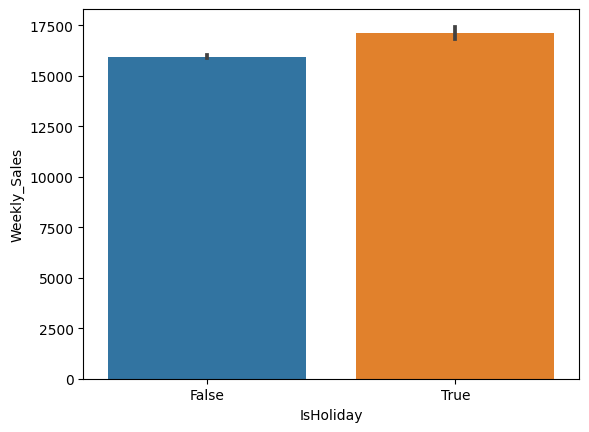

In [18]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=dataset)

In [122]:
df_holiday = dataset.loc[dataset['IsHoliday']==True]
df_holiday['Date'].unique() 

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

In [123]:
df_not_holiday = dataset.loc[dataset['IsHoliday']==False]
df_not_holiday['Date'].nunique() 

133

 When we look at the data, average weekly sales for holidays are significantly higher than not-holiday days. In train data, there are 133 weeks for non-holiday and 10 weeks for holiday.



In [124]:
# Super bowl dates in train set
dataset.loc[(dataset['Date'] == '2010-02-12')|(dataset['Date'] == '2011-02-11')|(dataset['Date'] == '2012-02-10'),'Super_Bowl'] = True
dataset.loc[(dataset['Date'] != '2010-02-12')&(dataset['Date'] != '2011-02-11')&(dataset['Date'] != '2012-02-10'),'Super_Bowl'] = False

In [125]:
# Labor day dates in train set
dataset.loc[(dataset['Date'] == '2010-09-10')|(dataset['Date'] == '2011-09-09')|(dataset['Date'] == '2012-09-07'),'Labor_Day'] = True
dataset.loc[(dataset['Date'] != '2010-09-10')&(dataset['Date'] != '2011-09-09')&(dataset['Date'] != '2012-09-07'),'Labor_Day'] = False

In [126]:
# Thanksgiving dates in train set
dataset.loc[(dataset['Date'] == '2010-11-26')|(dataset['Date'] == '2011-11-25'),'Thanksgiving'] = True
dataset.loc[(dataset['Date'] != '2010-11-26')&(dataset['Date'] != '2011-11-25'),'Thanksgiving'] = False


In [127]:
#Christmas dates in train set
dataset.loc[(dataset['Date'] == '2010-12-31')|(dataset['Date'] == '2011-12-30'),'Christmas'] = True
dataset.loc[(dataset['Date'] != '2010-12-31')&(dataset['Date'] != '2011-12-30'),'Christmas'] = False


In [128]:
dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,False,False,False
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,True,False,False,False
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,False,False,False,False
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,False,False,False,False
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,False,False,False,False


Type Effect on Holidays

<Axes: xlabel='Christmas', ylabel='Weekly_Sales'>

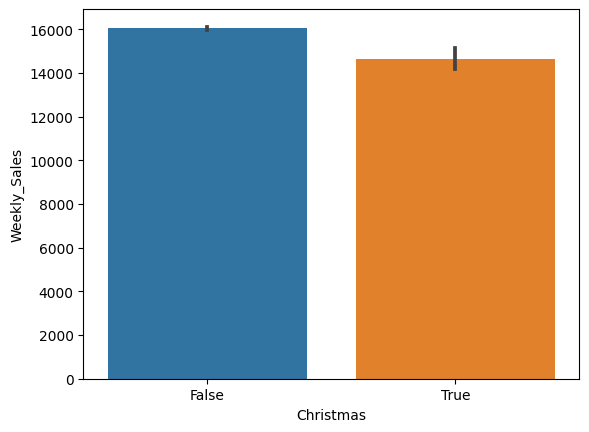

In [26]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=dataset) # Christmas holiday vs not-Christmas

<Axes: xlabel='Thanksgiving', ylabel='Weekly_Sales'>

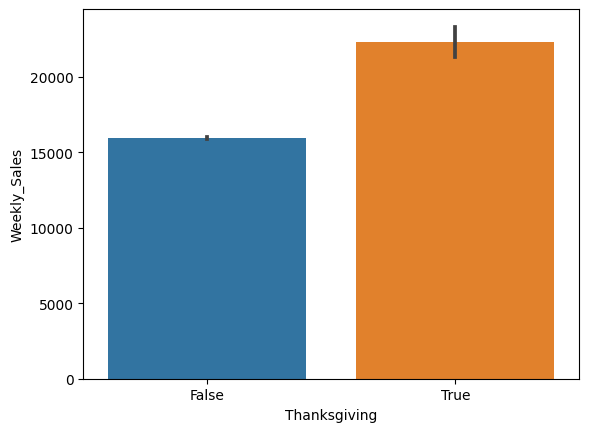

In [24]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=dataset) # Thanksgiving holiday vs not-thanksgiving

<Axes: xlabel='Super_Bowl', ylabel='Weekly_Sales'>

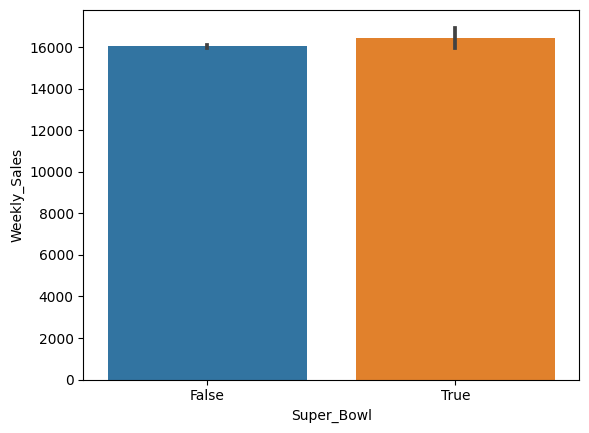

In [25]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=dataset) # Super bowl holiday vs not-super bowl

<Axes: xlabel='Labor_Day', ylabel='Weekly_Sales'>

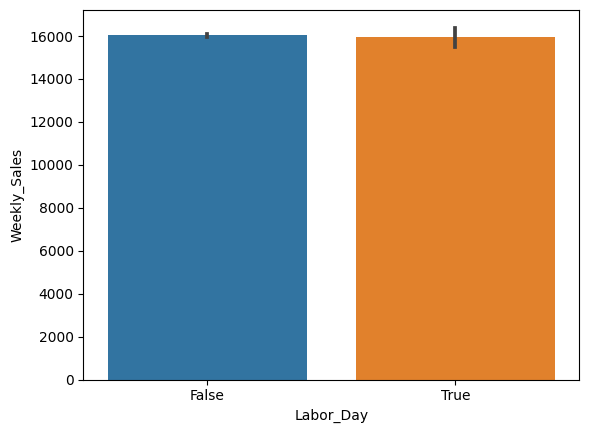

In [26]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=dataset) # Labor day holiday vs not-labor day

From the above graphs we can see labor day doesnt increase weekly sales

In [27]:
dataset.groupby(['Christmas','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Christmas 

Christmas  Type
False      A       20174.350209
           B       12301.986116
           C        9570.951973
True       A       18310.167535
           B       11488.988057
           C        8031.520607
Name: Weekly_Sales, dtype: float64

In [28]:
dataset.groupby(['Labor_Day','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Labor Day

Labor_Day  Type
False      A       20151.210941
           B       12294.954138
           C        9542.098293
True       A       20004.267422
           B       12084.304642
           C        9893.459258
Name: Weekly_Sales, dtype: float64

In [28]:
dataset.groupby(['Thanksgiving','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Thanksgiving

Thanksgiving  Type
False         A       20044.007801
              B       12197.717405
              C        9547.377807
True          A       27397.776346
              B       18733.973971
              C        9696.566616
Name: Weekly_Sales, dtype: float64

In [29]:
dataset.groupby(['Super_Bowl','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Super Bowl


Super_Bowl  Type
False       A       20138.055908
            B       12286.739293
            C        9536.110508
True        A       20612.757674
            B       12467.035506
            C       10179.271884
Name: Weekly_Sales, dtype: float64

% of store types

In [31]:
dataset.groupby('IsHoliday')['Weekly_Sales'].mean()

IsHoliday
False    15952.816352
True     17094.300918
Name: Weekly_Sales, dtype: float64

/tmp/ipykernel_33/2621990641.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


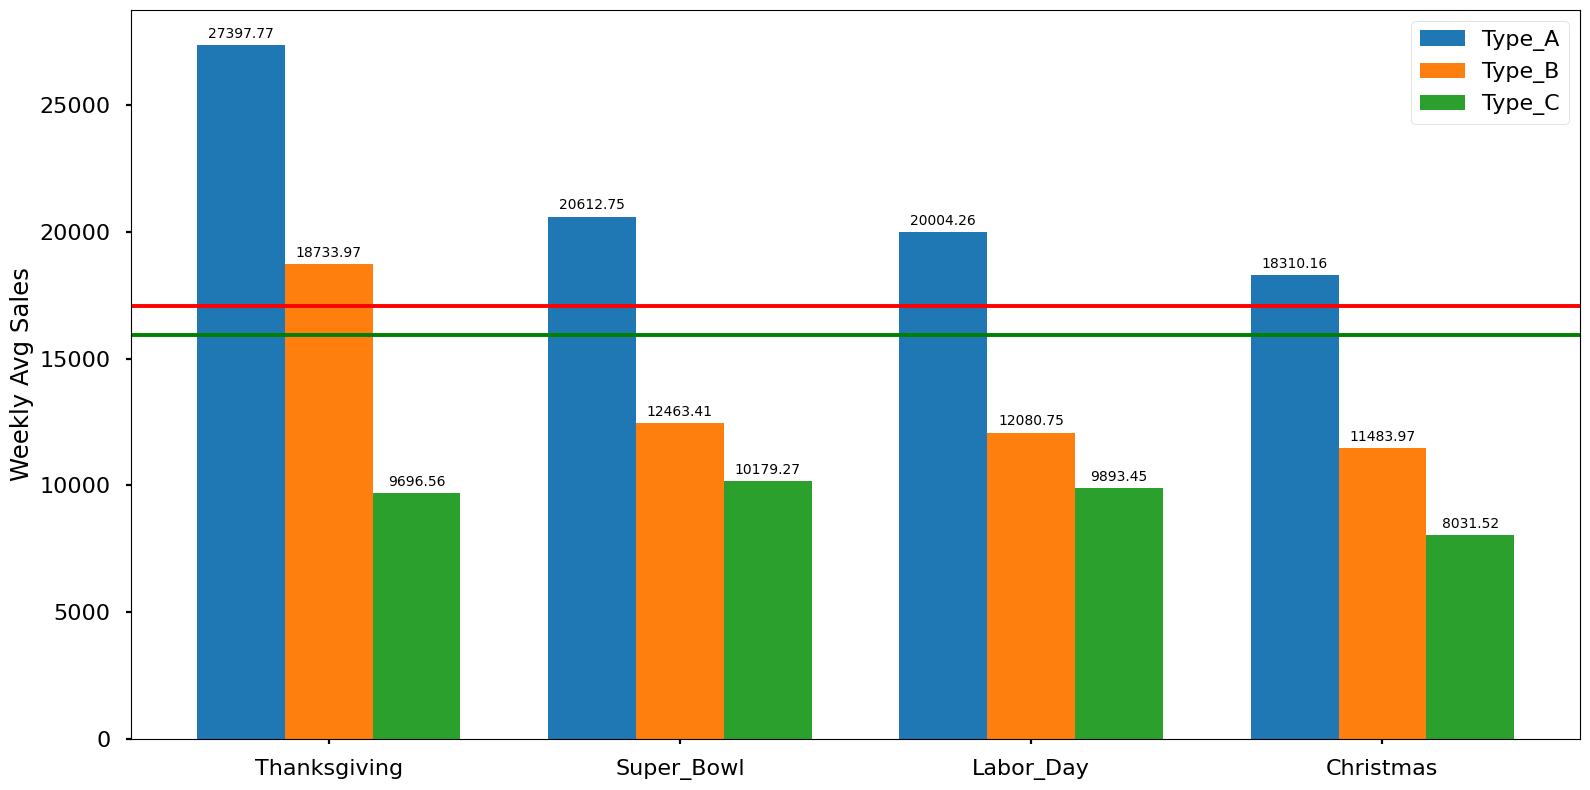

In [32]:
# Plotting avg wekkly sales according to holidays by types
plt.style.use('seaborn-poster')
labels = ['Thanksgiving', 'Super_Bowl', 'Labor_Day', 'Christmas']
A_means = [27397.77, 20612.75, 20004.26, 18310.16]
B_means = [18733.97, 12463.41, 12080.75, 11483.97]
C_means = [9696.56,10179.27,9893.45,8031.52]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x , B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.axhline(y=17094.30,color='r') # holidays avg
plt.axhline(y=15952.82,color='green') # not-holiday avg

fig.tight_layout()

plt.show()

It is seen from the graph that, highest sale average is in the Thanksgiving week between holidays. And, for all holidays Type A stores has highest sales. And in all stores min sale is at the time of christmas 

In [129]:
dataset.sort_values(by='Weekly_Sales',ascending=False).head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas
95373,10,72,2010-11-26,693099.36,True,55.33,3.162,NaN,NaN,NaN,NaN,NaN,126.669267,9.003,B,126512,False,False,True,False
338013,35,72,2011-11-25,649770.18,True,47.88,3.492,1333.24,NaN,58563.24,20.97,6386.86,140.421786,8.745,B,103681,False,False,True,False
95425,10,72,2011-11-25,630999.19,True,60.68,3.760,174.72,329.0,141630.61,79.00,1009.98,129.836400,7.874,B,126512,False,False,True,False
337961,35,72,2010-11-26,627962.93,True,46.67,3.039,NaN,NaN,NaN,NaN,NaN,136.689571,8.763,B,103681,False,False,True,False
135665,14,72,2010-11-26,474330.10,True,46.15,3.039,NaN,NaN,NaN,NaN,NaN,182.783277,8.724,A,200898,False,False,True,False


To See the Size - Type Relation

In [36]:
stores_df.groupby('Type').describe()['Size'].round(2) # See the Size-Type relation

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
A,22.0,177247.73,49392.62,39690.0,155840.75,202406.0,203819.0,219622.0
B,17.0,101190.71,32371.14,34875.0,93188.00,114533.0,123737.0,140167.0
C,6.0,40541.67,1304.15,39690.0,39745.00,39910.0,40774.0,42988.0


Markdown columns has nan values will make it zero 

In [37]:
dataset.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270031
MarkDown2       309308
MarkDown3       283561
MarkDown4       285694
MarkDown5       269283
CPI                  0
Unemployment         0
Type                 0
Size                 0
Super_Bowl           0
Labor_Day            0
Thanksgiving         0
Christmas            0
dtype: int64

In [130]:
dataset = dataset.fillna(0) # filling null's with 0

In [131]:
dataset.isna().sum() # last null check

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Super_Bowl      0
Labor_Day       0
Thanksgiving    0
Christmas       0
dtype: int64

Deeper Look in Sales

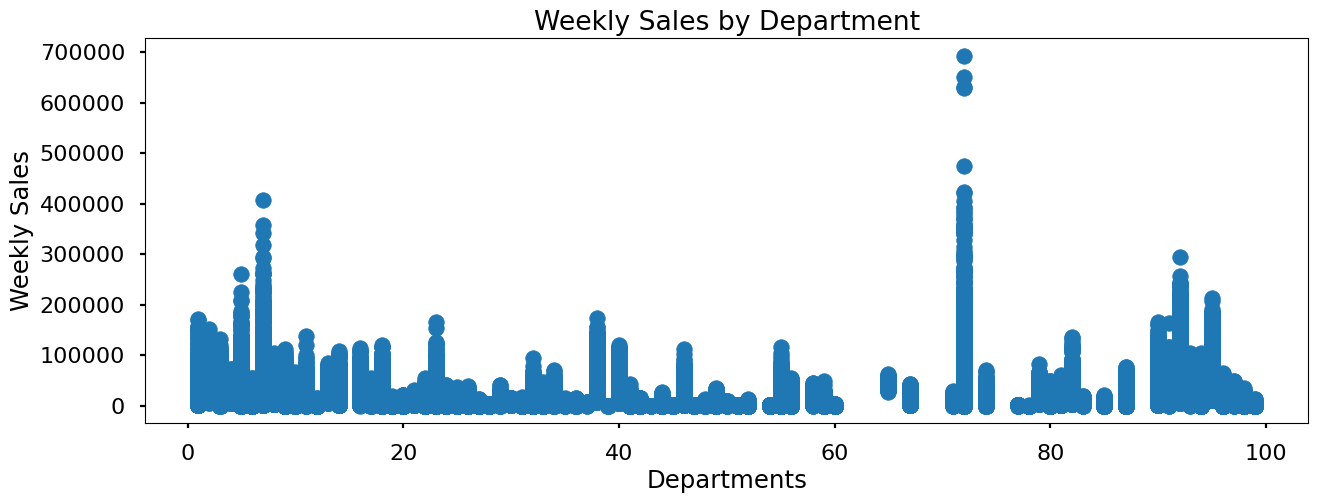

In [132]:
x = dataset['Dept']
y = dataset['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Department')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

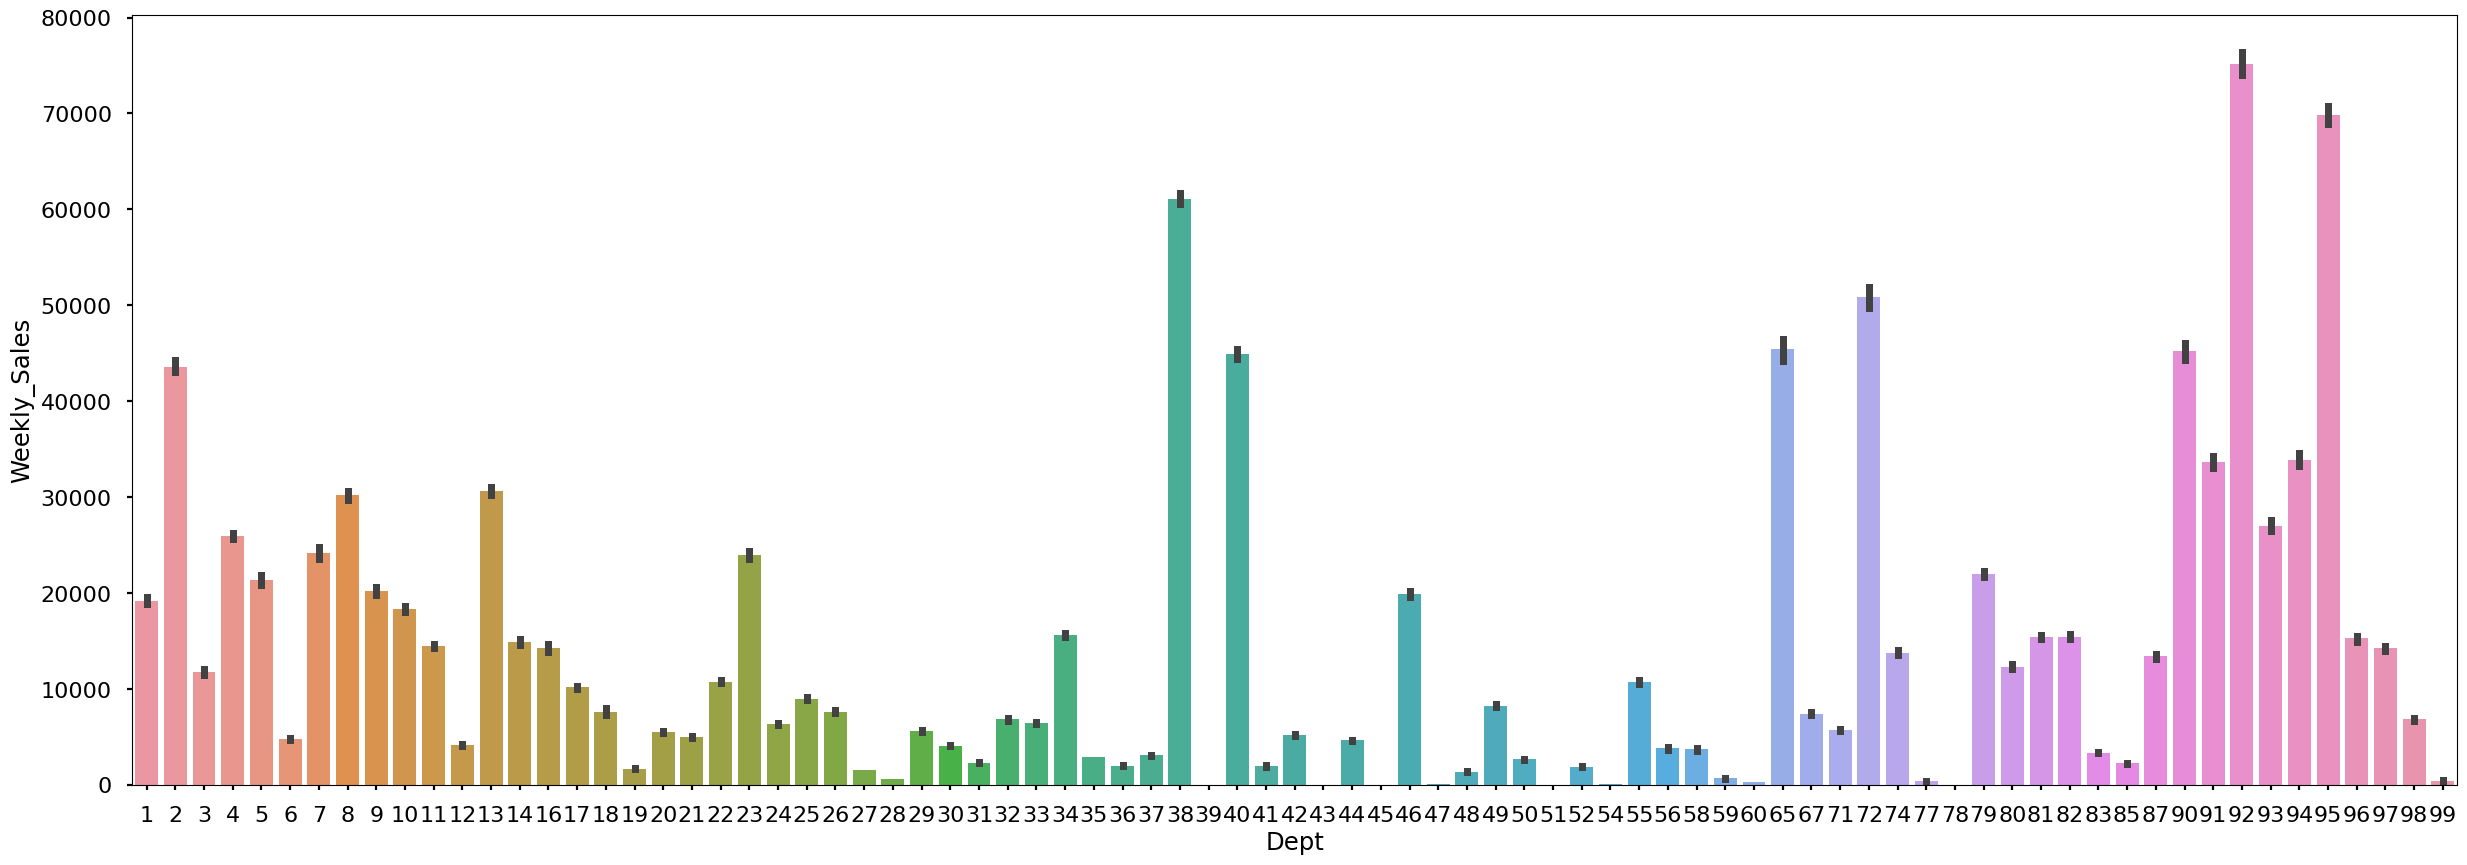

In [41]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=dataset)

From the first graph, it is seen that one department between 60-80, has higher sales values. But on average 92 is higher.

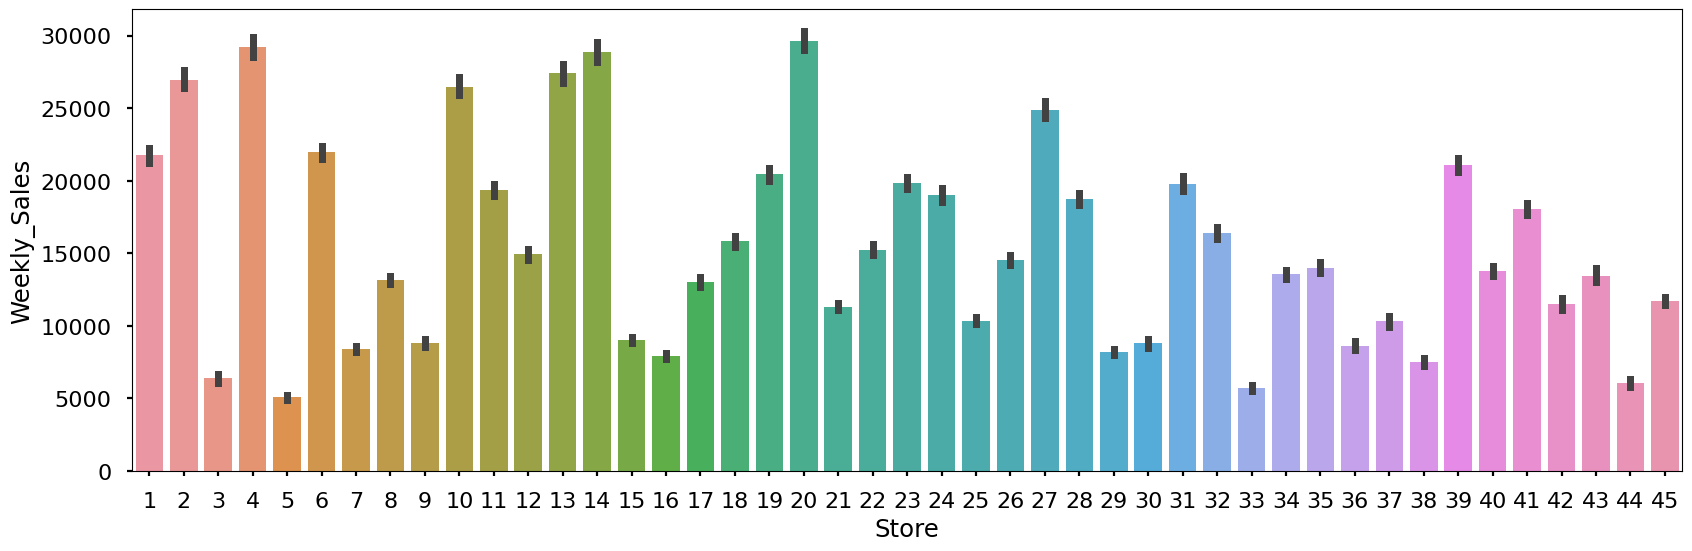

In [42]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=dataset)


Store 20 has the highest sale, followed by 4 and 14

Changing Date to Datetime and Creating New Columns¶

In [133]:
dataset["Date"] = pd.to_datetime(dataset["Date"]) # convert to datetime
dataset['week'] =dataset['Date'].dt.isocalendar().week
dataset['month'] =dataset['Date'].dt.month 
dataset['year'] =dataset['Date'].dt.year


In [134]:
dataset.groupby('month')['Weekly_Sales'].mean() # to see the best months for sales


month
1     14182.239153
2     16048.701191
3     15464.817698
4     15696.435193
5     15845.556200
6     16397.605478
7     15905.472425
8     16113.800069
9     15147.216063
10    15279.182119
11    17534.964277
12    19425.798603
Name: Weekly_Sales, dtype: float64

In [46]:
dataset.groupby('year')['Weekly_Sales'].mean() 

year
2010    16318.648285
2011    16007.797985
2012    15748.265005
Name: Weekly_Sales, dtype: float64

2011 has lower sales than 2010

In [47]:
dataset.groupby('week')['Weekly_Sales'].mean().sort_values(ascending=False).head()

week
51    26454.164116
47    22269.601768
50    20478.421134
49    18731.794840
22    16856.650245
Name: Weekly_Sales, dtype: float64

Top 5 sales averages by weekly belongs to 1-2 weeks before Christmas, Thanksgiving, Black Friday and end of May, when the schools are closed.

Fuel Price, CPI , Unemployment , Temperature Effects

<Axes: xlabel='Fuel_Price'>

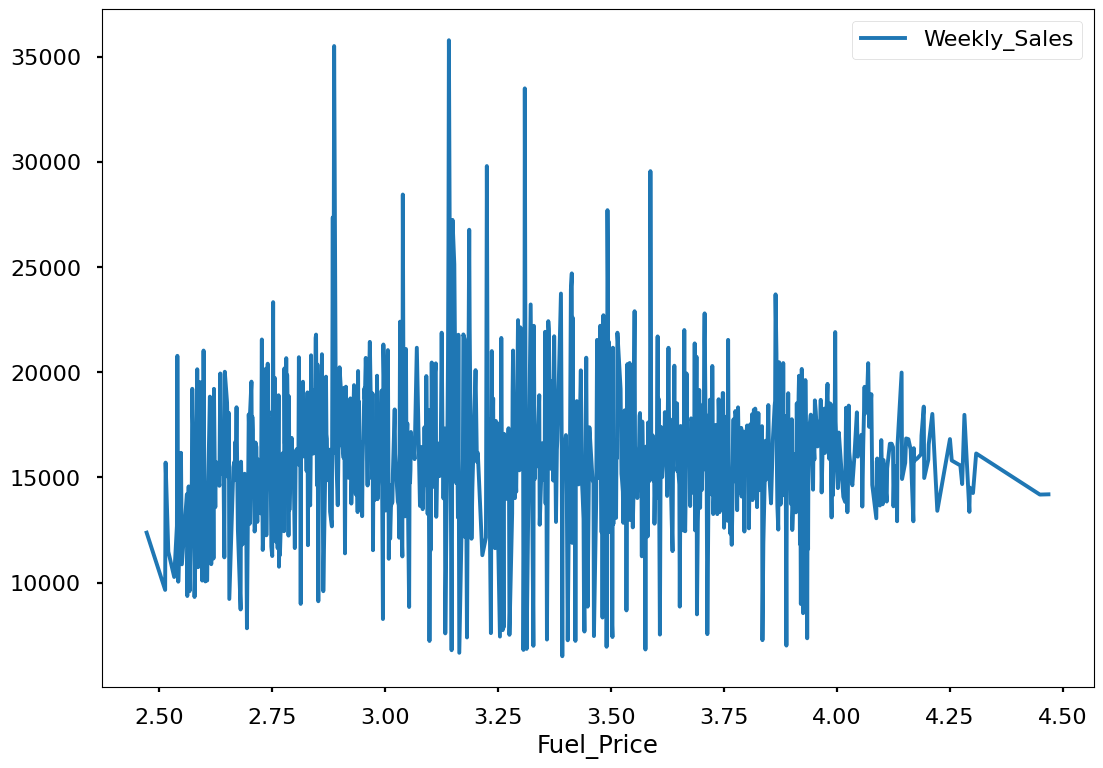

In [135]:
fuel_price = pd.pivot_table(dataset, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

<Axes: xlabel='Temperature'>

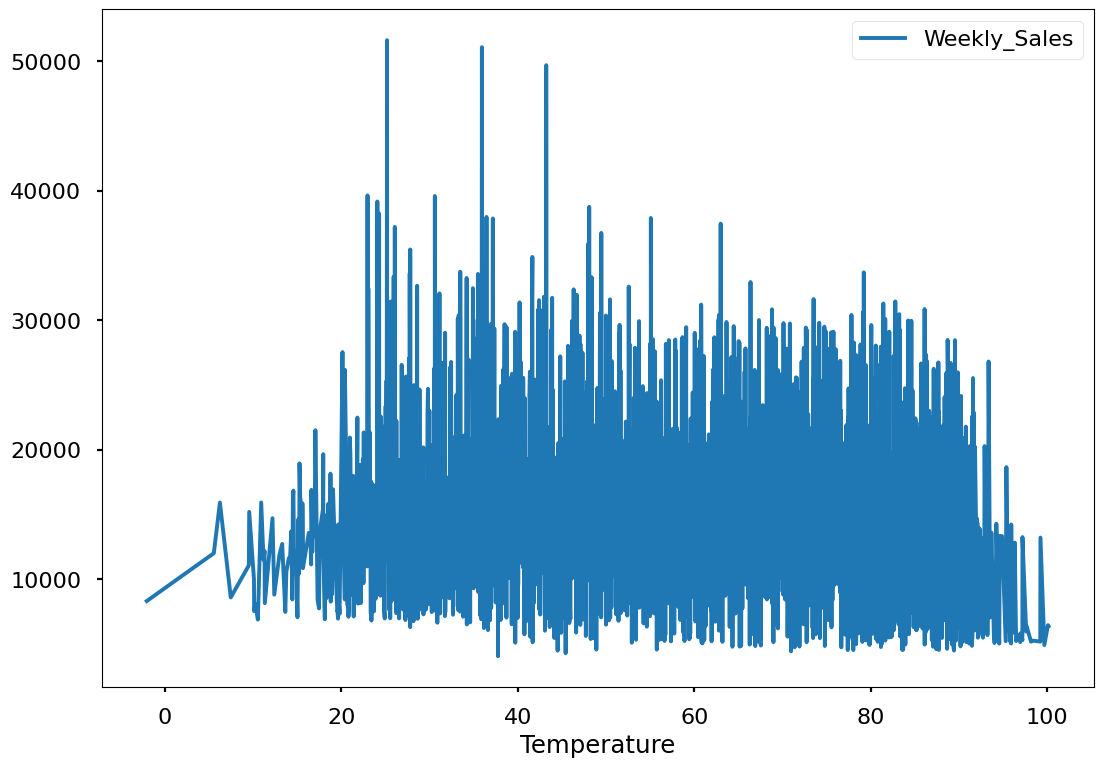

In [49]:
temp = pd.pivot_table(dataset, values = "Weekly_Sales", index= "Temperature")
temp.plot()

<Axes: xlabel='CPI'>

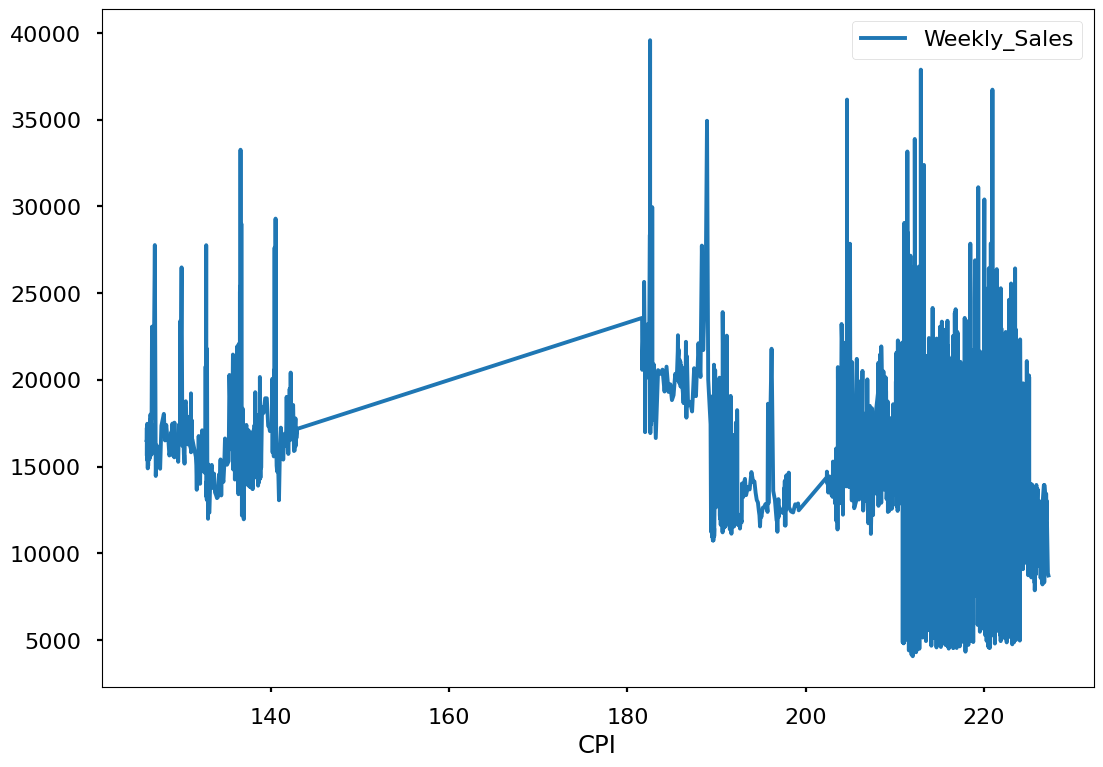

In [50]:
CPI = pd.pivot_table(dataset, values = "Weekly_Sales", index= "CPI")
CPI.plot()

<Axes: xlabel='Unemployment'>

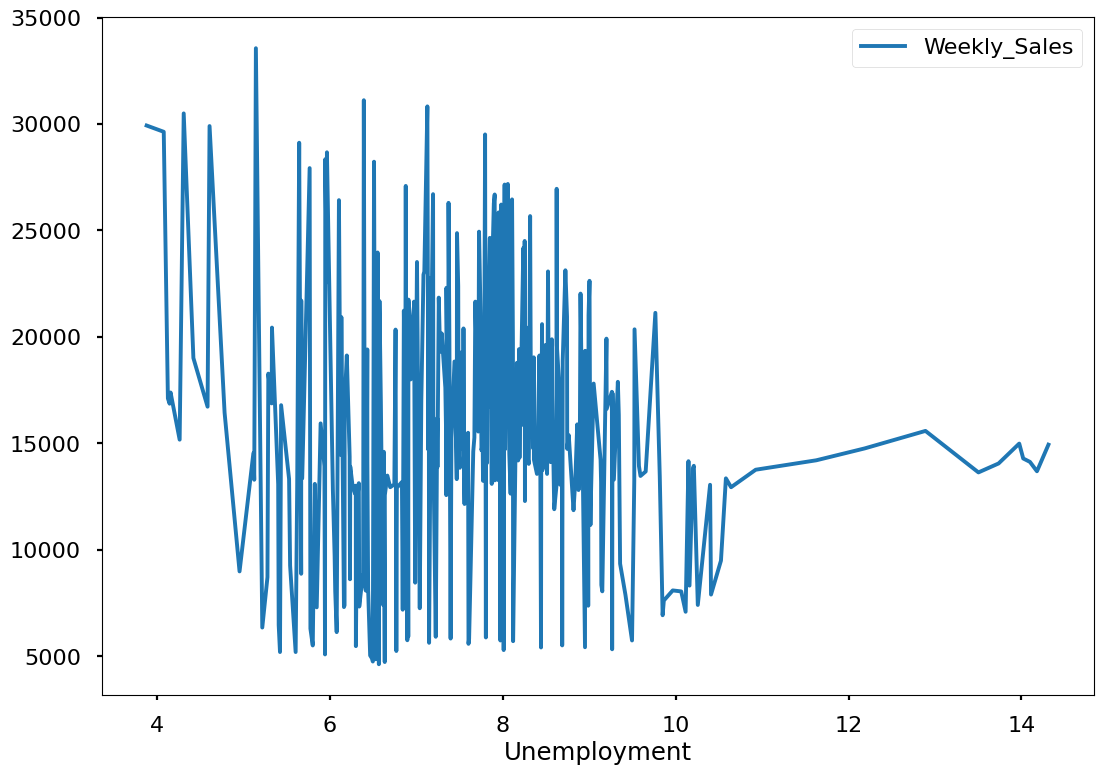

In [51]:
unemployment = pd.pivot_table(dataset, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot()

From graphs, it is seen that there are no significant patterns between CPI, temperature, unemployment rate, fuel price vs weekly sales. 

1. Random Forest

Generally, Rondom Forest Regressor gives good results when we tune it well. So, to find simple baseline model,will use RandomForestRegressor in this notebook.
Our metric for this project is weighted mean absolute error (WMAE):

In [53]:
dataset.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Super_Bowl',
       'Labor_Day', 'Thanksgiving', 'Christmas', 'week', 'month', 'year'],
      dtype='object')

In [136]:
df_encoded = dataset.copy() 

In [137]:
type_group = {'A':1, 'B': 2, 'C': 3}  # changing A,B,C to 1-2-3
df_encoded['Type'] = df_encoded['Type'].replace(type_group)

In [138]:
df_encoded['Super_Bowl'] = df_encoded['Super_Bowl'].astype(bool).astype(int) # changing T,F to 0-1


In [139]:
df_encoded['Thanksgiving'] = df_encoded['Thanksgiving'].astype(bool).astype(int) # changing T,F to 0-1

In [140]:
df_encoded['Labor_Day'] = df_encoded['Labor_Day'].astype(bool).astype(int) # changing T,F to 0-1
df_encoded['Christmas'] = df_encoded['Christmas'].astype(bool).astype(int) # changing T,F to 0-1
df_encoded['IsHoliday'] = df_encoded['IsHoliday'].astype(bool).astype(int) # changing T,F to 0-1
df_new = df_encoded.copy() # taking the copy of encoded df to keep it original

Correlations between Features¶

Firstly, i will drop divided holiday columns from my data and try without them. To keep my encoded data safe, I assigned my dataframe to new one and I will use for this.

In [141]:
drop_col = ['Super_Bowl','Labor_Day','Thanksgiving','Christmas']
df_new.drop(drop_col, axis=1, inplace=True) # dropping columns


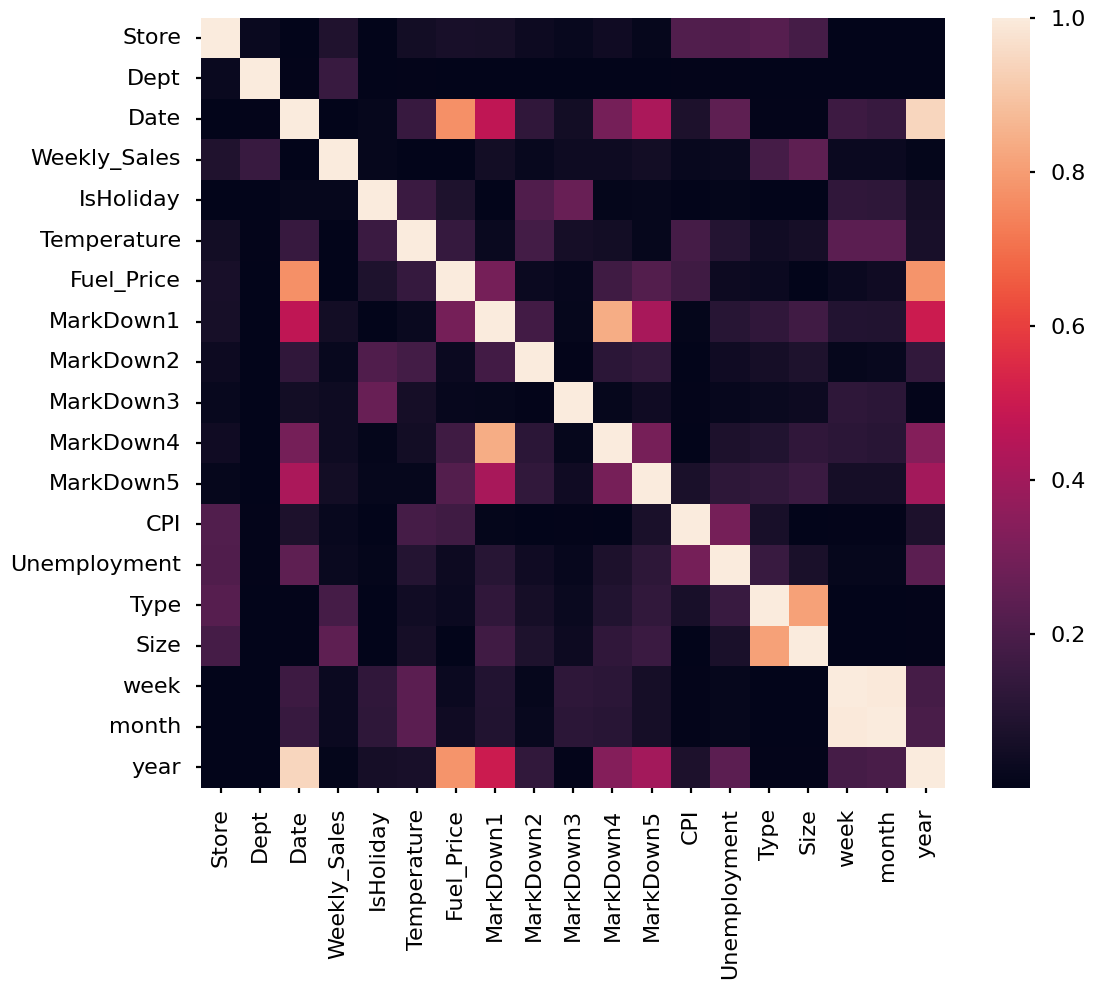

In [60]:
plt.figure(figsize = (12,10))
sns.heatmap(df_new.corr().abs())    # To see the correlations
plt.show()

temperature, unemployment, CPI have no significant effect on weekly sales, so I will drop them. Also, Markdown 4 and 5 highly correlated with Markdown 1. So, I will drop them also. It can create multicollinearity problem, maybe. So, first I will try without them.

In [142]:
drop_col = ['Temperature','MarkDown4','MarkDown5','CPI','Unemployment']
df_new.drop(drop_col, axis=1, inplace=True) # dropping columns

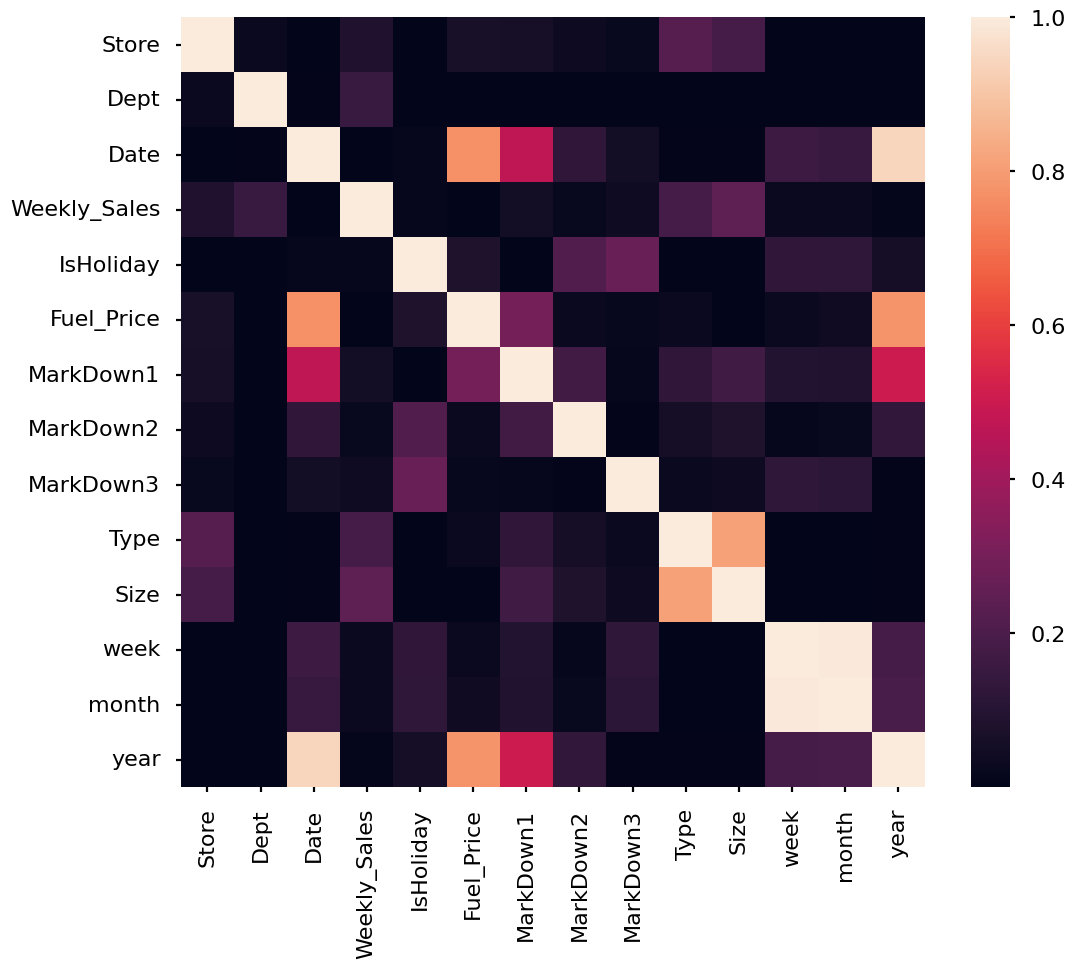

In [62]:
plt.figure(figsize = (12,10))
sns.heatmap(df_new.corr().abs())    # To see the correlations without dropping columns
plt.show()

Size and type are highly correlated with weekly sales. 

In [143]:
df_new = df_new.sort_values(by='Date', ascending=True) # sorting according to date

Train-Test splits

In [144]:
train_data = df_new[:int(0.7*(len(df_new)))] # taking train part
test_data = df_new[int(0.7*(len(df_new))):] # taking test part

target = "Weekly_Sales"
used_cols = [c for c in df_new.columns.to_list() if c not in [target]] # all columns except weekly sales

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

In [145]:
X = df_new[used_cols] # to keep train and test X values together

In [146]:
X_train = X_train.drop(['Date'], axis=1) # dropping date from train
X_test = X_test.drop(['Date'], axis=1) # dropping date from test

Metric

In [147]:
def wmae_test(test, pred): # WMAE for test 
    weights = X_test['IsHoliday'].apply(lambda is_holiday:5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error

Random Forest Regressor

In [148]:
# Another imports if needs
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
!pip install pmdarima
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima


import warnings
warnings.filterwarnings("ignore")

In [149]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()



#making pipe tp use scaler and regressor together
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train, y_train)

# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

In [150]:
wmae_test(y_test, y_pred_test)

5697.712824122053

Time Series model

In [73]:
dataset.head() # to see my data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,...,8.106,A,151315,True,False,False,False,6,2,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,...,8.106,A,151315,False,False,False,False,7,2,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,...,8.106,A,151315,False,False,False,False,8,2,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,...,8.106,A,151315,False,False,False,False,9,3,2010


In [151]:
dataset["Date"] = pd.to_datetime(dataset["Date"]) #changing data to datetime for decomposing

In [152]:
dataset.set_index('Date', inplace=True) #seting date as index

In [153]:
dataset.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
2010-02-12,1,1,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,...,8.106,A,151315,True,False,False,False,6,2,2010
2010-02-19,1,1,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,...,8.106,A,151315,False,False,False,False,7,2,2010
2010-02-26,1,1,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,...,8.106,A,151315,False,False,False,False,8,2,2010
2010-03-05,1,1,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,...,8.106,A,151315,False,False,False,False,9,3,2010


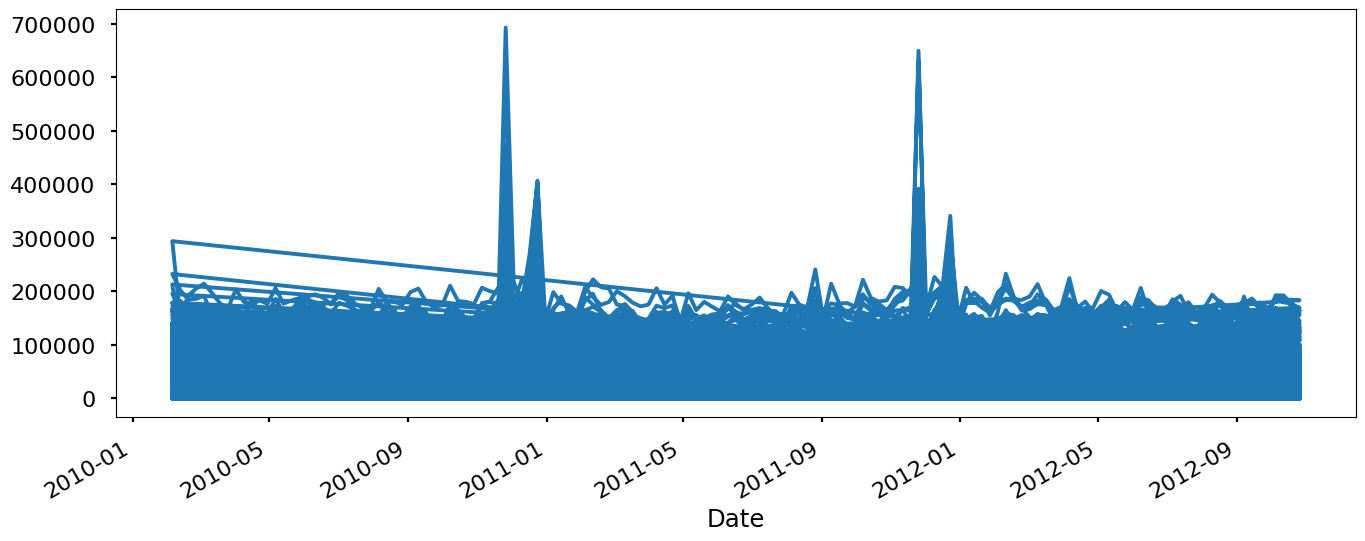

In [76]:
plt.figure(figsize=(16,6))
dataset['Weekly_Sales'].plot()
plt.show()


In [154]:
df_week = dataset.Weekly_Sales.resample('W').mean() #resample data as weekly

In [155]:
df_week.head()

Date
2010-02-07    16887.602166
2010-02-14    16390.912208
2010-02-21    16255.185970
2010-02-28    14955.932194
2010-03-07    15964.821240
Freq: W-SUN, Name: Weekly_Sales, dtype: float64

In [85]:
type(df_week)

pandas.core.series.Series

In [156]:
df_week2=pd.DataFrame([df_week])

In [157]:
df_week3 = df_week2.transpose() 

In [158]:
df_week3

,Weekly_Sales
Date,
2010-02-07,16887.602166
2010-02-14,16390.912208
2010-02-21,16255.185970
2010-02-28,14955.932194
2010-03-07,15964.821240
...,...
2012-09-30,14815.621125
2012-10-07,16037.442175
2012-10-14,15484.696200


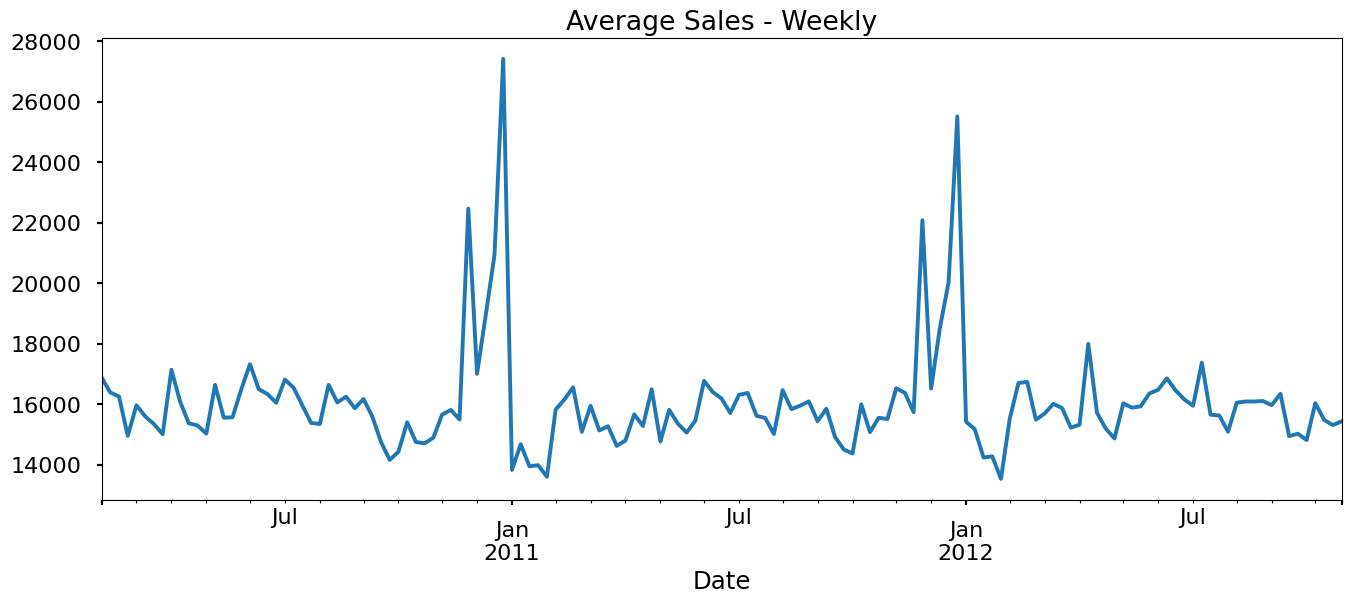

In [92]:
plt.figure(figsize=(16,6))
df_week3['Weekly_Sales'].plot()
plt.title('Average Sales - Weekly')
plt.show()

To Observe 2-weeks Rolling Mean and Std

In [159]:
# finding 2-weeks rolling mean and std
roll_mean = df_week3['Weekly_Sales'].rolling(window=2, center=False).mean()
roll_std = df_week3['Weekly_Sales'].rolling(window=2, center=False).std()

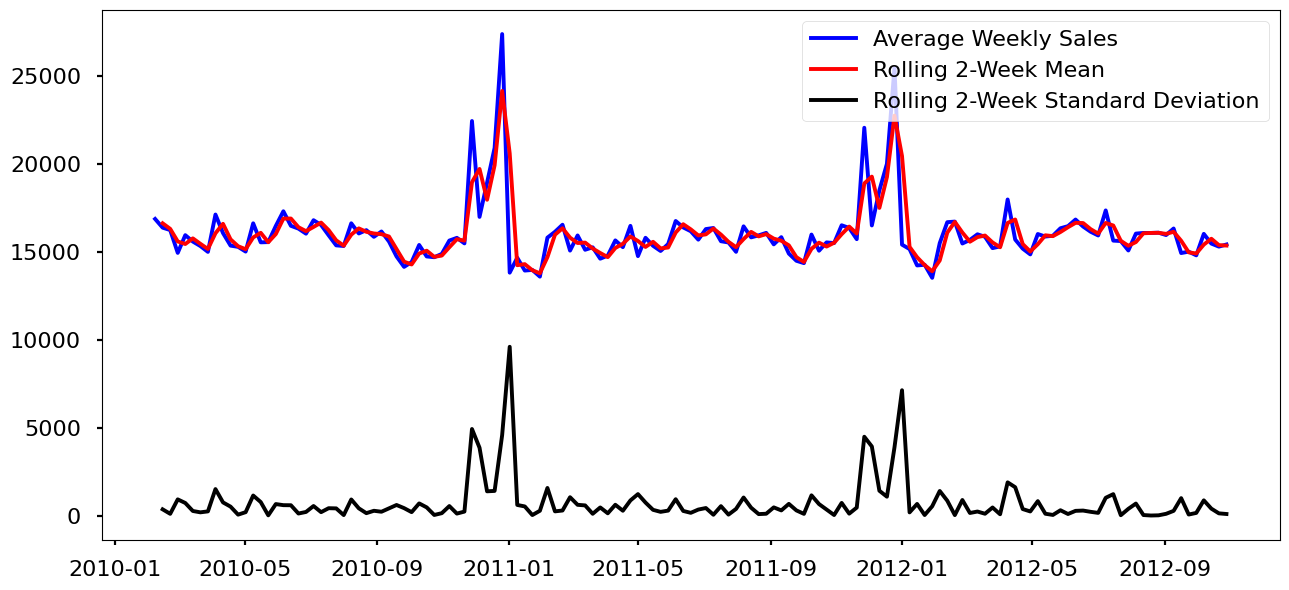

In [95]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week3['Weekly_Sales'], color='blue',label='Average Weekly Sales')
ax.plot(roll_mean, color='red', label='Rolling 2-Week Mean')
ax.plot(roll_std, color='black', label='Rolling 2-Week Standard Deviation')
ax.legend()
fig.tight_layout()

Adfuller Test to Make Sure

In [160]:
adfuller(df_week3['Weekly_Sales'])

(-5.927107223737572,
 2.4290492082042356e-07,
 4,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 2261.596421168073)

The ADF test performed provides a strong indication that the series is stationary (p-value << 0.05). This suggests that despite the visual indications of non-stationarity during high sales periods, the series as a whole can be considered stationary for modeling purposes.
I still had concerns about the spikes affecting our model's performance,I consider the following preprocessing steps:

Differencing
Shifting
Transformation


Train - Test Split of Weekly Data

In [161]:
train_data = df_week3[:int(0.7*(len(df_week3)))] 
test_data = df_week3[int(0.7*(len(df_week3))):]

print('Train:', train_data.shape)
print('Test:', test_data.shape)


Train: (100, 1)
Test: (43, 1)


In [162]:
target = "Weekly_Sales"
used_cols = [c for c in df_week3.columns.to_list() if c not in [target]] # all columns except price

# assigning train-test X-y values

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

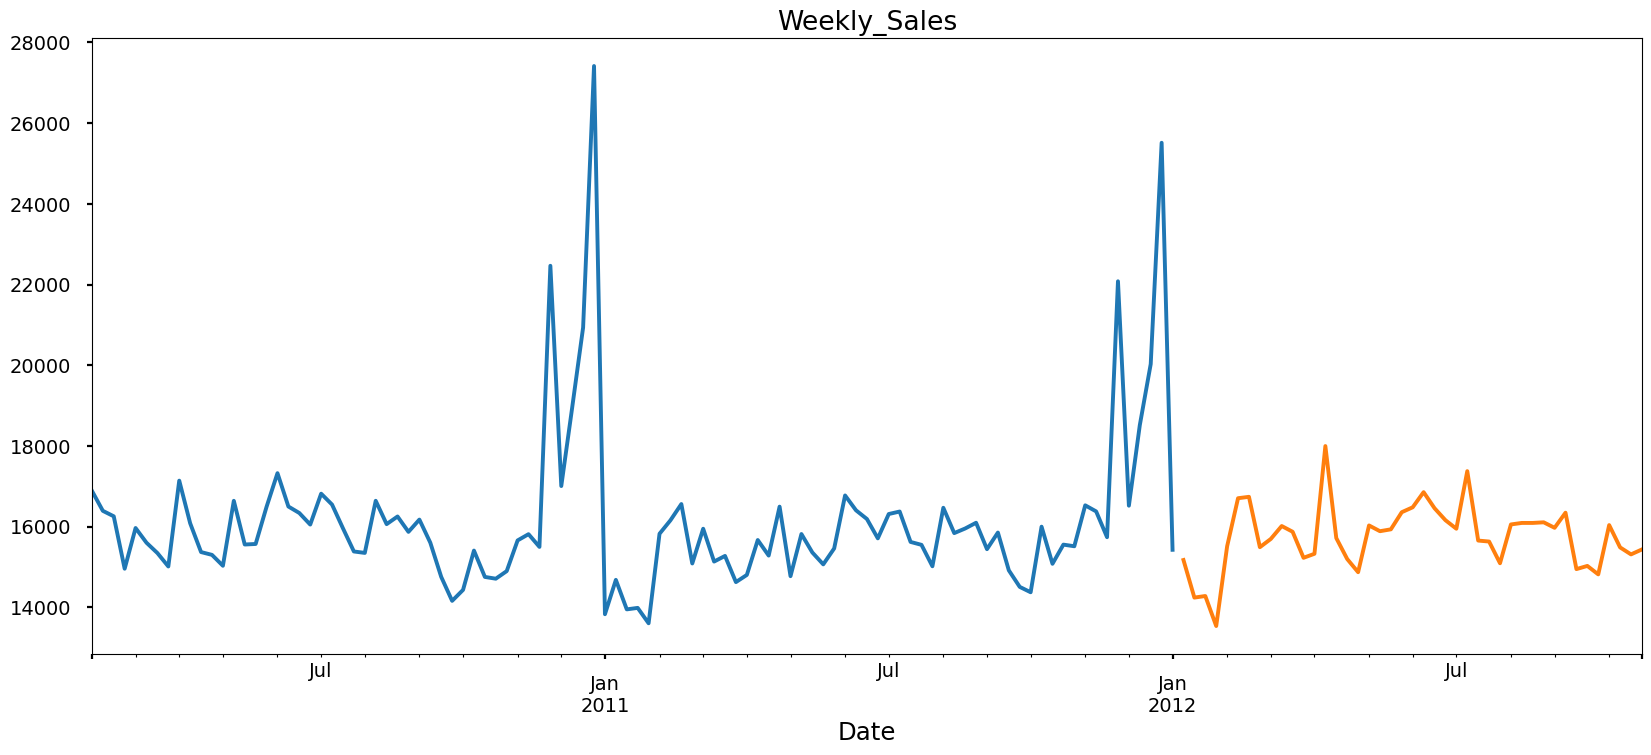

In [163]:
train_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
test_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.show()

Decomposing Weekly Data to Observe Seasonality

In [164]:
decomposed = decompose(df_week3['Weekly_Sales'].values, 'additive', m=20) #decomposing of weekly data

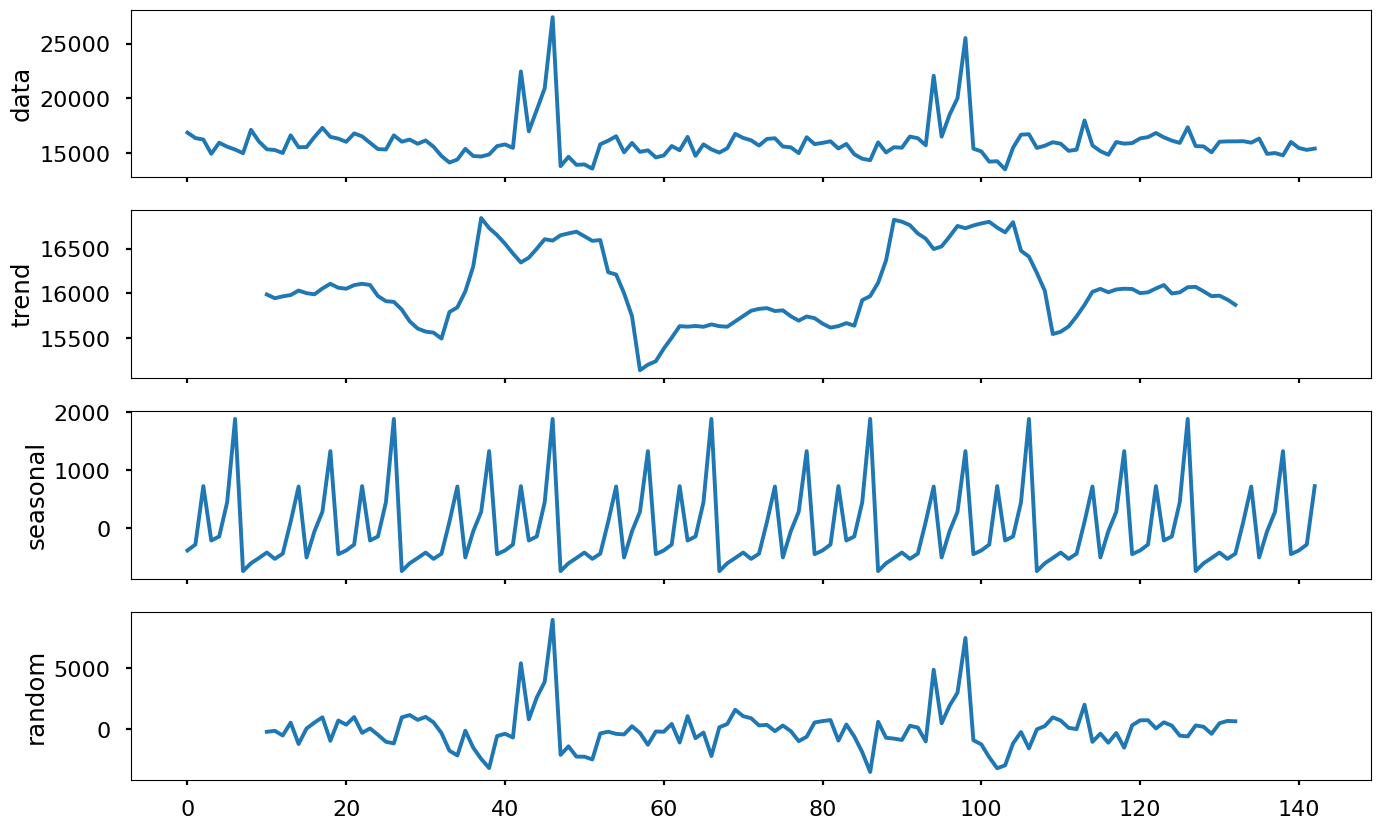

In [101]:
decomposed_plot(decomposed, figure_kwargs={'figsize': (16, 10)})
plt.show()

From the graphs above, every 20 step seasonality converges to beginning point. This helps me to tune my model.



Trying To Make Data More Stationary

1. Difference

In [165]:
df_week_diff = df_week3['Weekly_Sales'].diff().dropna() #creating difference values


In [166]:
# taking mean and std of differenced data
diff_roll_mean = df_week_diff.rolling(window=2, center=False).mean()
diff_roll_std = df_week_diff.rolling(window=2, center=False).std()

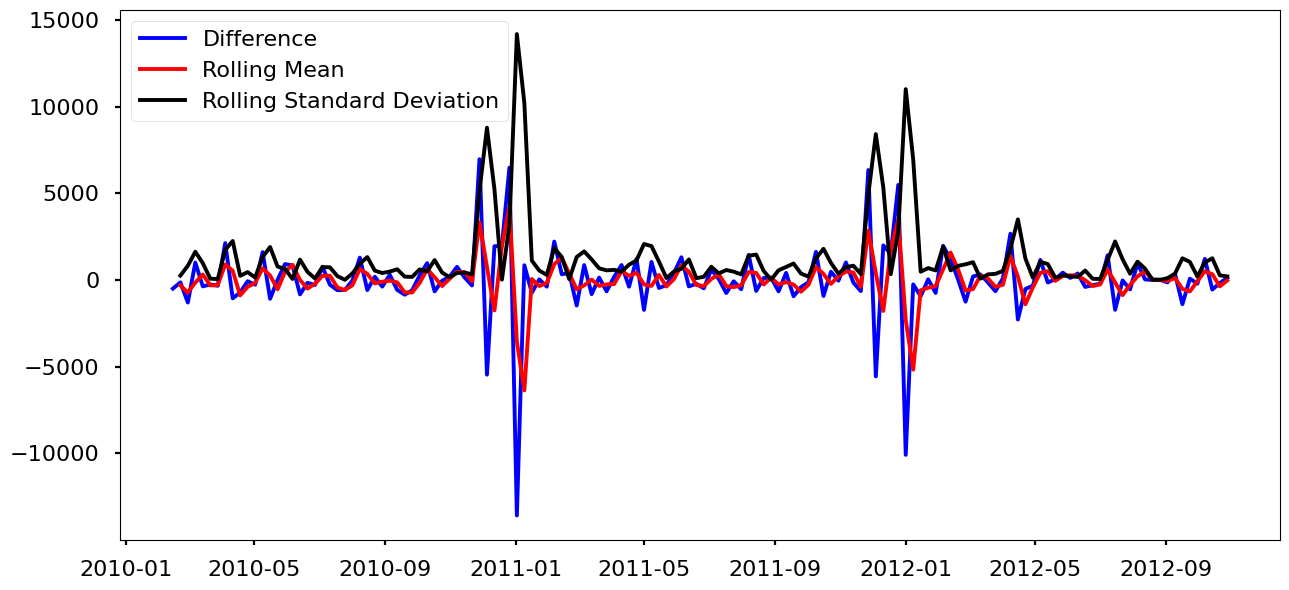

In [167]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_diff, color='blue',label='Difference')
ax.plot(diff_roll_mean, color='red', label='Rolling Mean')
ax.plot(diff_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

2. Shift

In [168]:
df_week_lag = df_week3['Weekly_Sales'].shift().dropna() #shifting the data 

In [170]:
lag_roll_mean = df_week_lag.rolling(window=2, center=False).mean() 
lag_roll_std = df_week_lag.rolling(window=2, center=False).std()

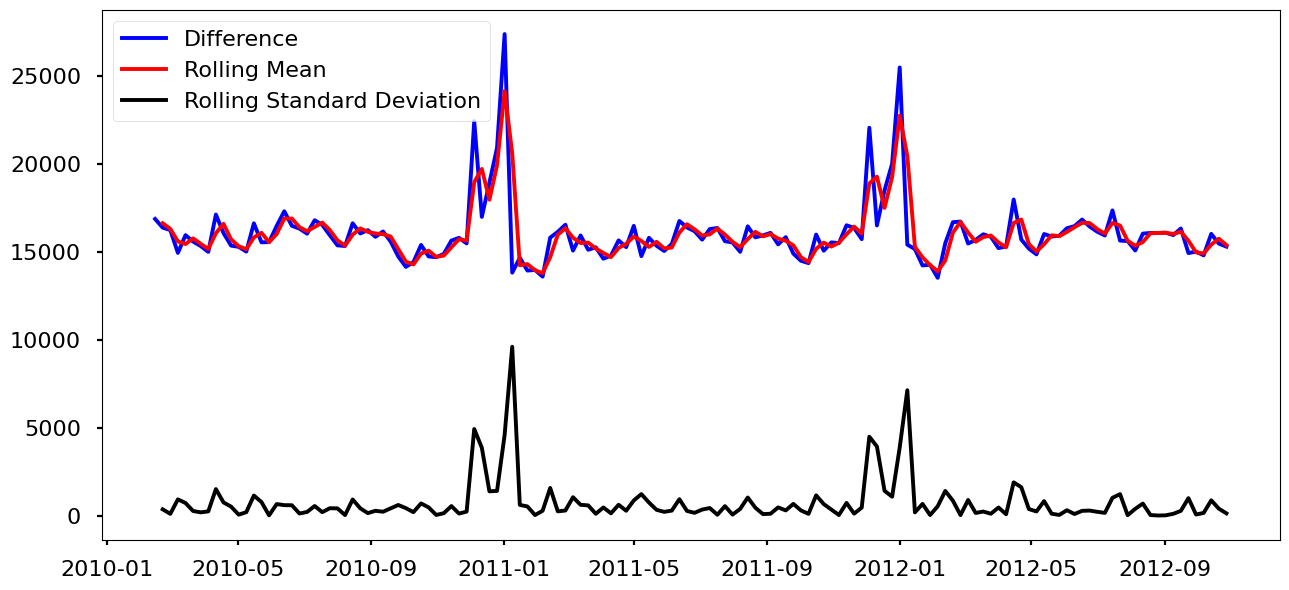

In [171]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_lag, color='blue',label='Difference')
ax.plot(lag_roll_mean, color='red', label='Rolling Mean')
ax.plot(lag_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

3. Log 

In [172]:
logged_week = np.log1p(df_week3['Weekly_Sales']).dropna() #taking log of data

In [173]:
log_roll_mean = logged_week.rolling(window=2, center=False).mean()
log_roll_std = logged_week.rolling(window=2, center=False).std()

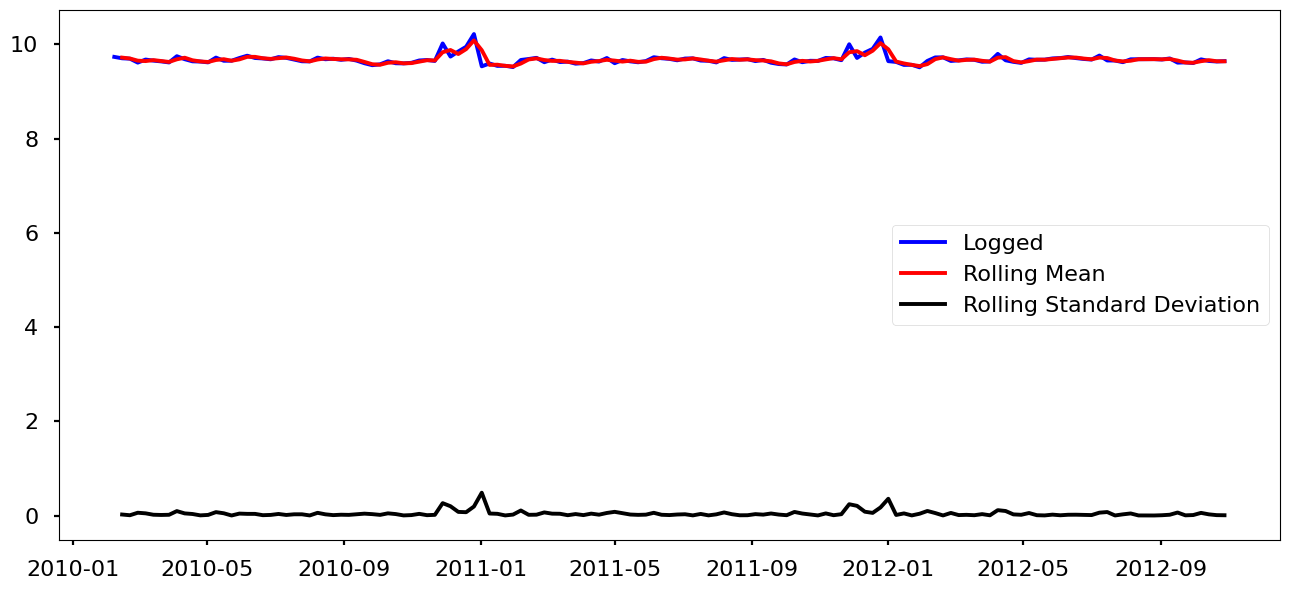

In [174]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(logged_week, color='blue',label='Logged')
ax.plot(log_roll_mean, color='red', label='Rolling Mean')
ax.plot(log_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

****Auto-ARIMA MODEL****

Tried my data without any changes, then tried with shifting, taking log and difference version of data. Differenced data gave best results. So, I decided to take difference and use this data.



In [175]:
train_data_diff = df_week_diff [:int(0.7*(len(df_week_diff )))]
test_data_diff = df_week_diff [int(0.7*(len(df_week_diff ))):]

In [112]:
model_auto_arima = auto_arima(train_data_diff, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=200,
                  information_criterion='aic',stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
model_auto_arima.fit(train_data_diff)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=1826.858, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=1793.619, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=1795.532, Time=0.25 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=1.66 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=1804.051, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=1794.966, Time=0.28 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=1.34 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=1801.215, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=1.38 sec
 ARIMA(3,0,0)(0,0,0)[1] intercept   : AIC=1791.045, Tim

ARIMA(maxiter=200, order=(3, 0, 2), scoring_args={},
      seasonal_order=(0, 0, 0, 1), suppress_warnings=True)

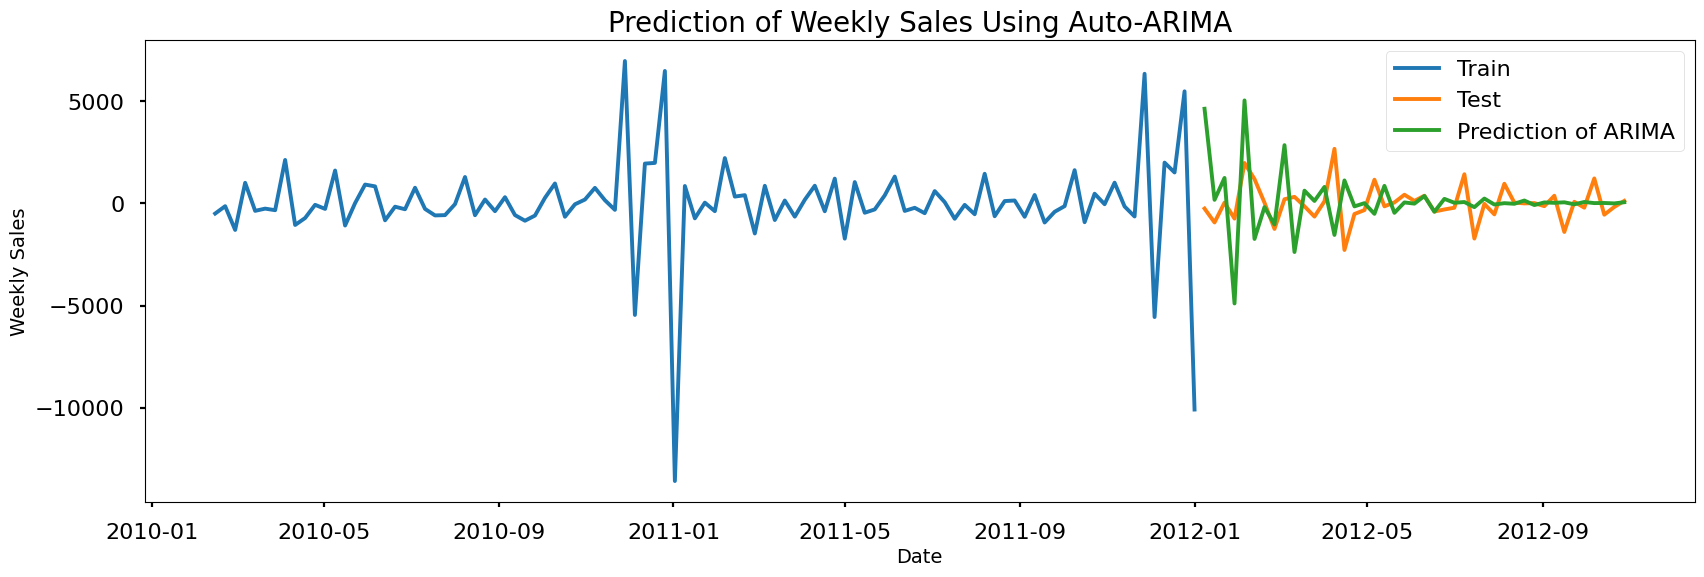

In [113]:
y_pred = model_auto_arima.predict(n_periods=len(test_data_diff))
y_pred = pd.DataFrame(y_pred,index = test_data.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales Using Auto-ARIMA', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction of ARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

ARIMA with log transformation data

In [178]:
train_data_log = logged_week [:int(0.7*(len(logged_week )))]
test_data_log = logged_week [int(0.7*(len(logged_week ))):]

In [179]:
model_auto_arima = auto_arima(train_data_log, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=200,
                  information_criterion='aic',stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
model_auto_arima.fit(train_data_log)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=-155.782, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=-163.131, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=-165.986, Time=0.18 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=-165.855, Time=0.42 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=-188.147, Time=0.42 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=-186.808, Time=0.59 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=-167.094, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=-167.654, Time=1.08 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=-164.371, Time=0.20 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=-166.232, Time=1.53 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=-186.642, Time=1.02 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=-168.313, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=-166.314, Time=0.52 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=-167.339, Time=1.78 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=-171.376, Time=1.55 sec
 ARIMA(3,0

ARIMA(maxiter=200, order=(0, 0, 4), scoring_args={},
      seasonal_order=(0, 0, 0, 1), suppress_warnings=True)

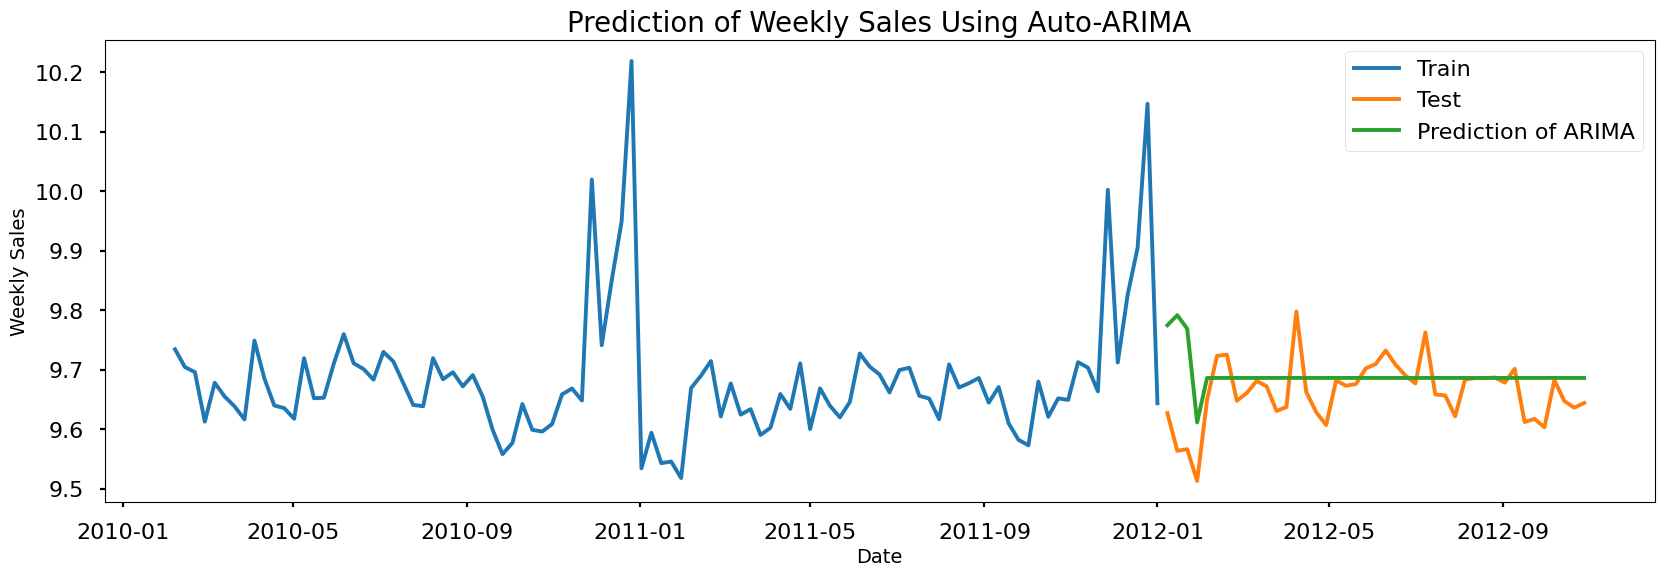

In [180]:
y_pred = model_auto_arima.predict(n_periods=len(test_data_log))
y_pred = pd.DataFrame(y_pred,index = test_data.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales Using Auto-ARIMA', fontsize=20)
plt.plot(train_data_log, label='Train')
plt.plot(test_data_log, label='Test')
plt.plot(y_pred, label='Prediction of ARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [181]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Apply seasonal decomposition
df_week_seasonal = seasonal_decompose(df_week3['Weekly_Sales'], model='multiplicative', period=52) # Assuming weekly data with yearly seasonality



In [185]:
# Extract the residual component
residual = df_week_seasonal.resid.dropna()

# Split the residual component into training and test sets
split_idx = int(0.7 * len(residual))
train_residual = residual[:split_idx]
test_residual = residual[split_idx:]


In [186]:
# Fit the ARIMA model on the residual component
model_auto_arima = auto_arima(train_residual, trace=True, start_p=0, start_q=0, start_P=0, start_Q=0,
                              max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True, maxiter=200,
                              information_criterion='aic', stepwise=False, suppress_warnings=True, D=1, max_D=10,
                              error_action='ignore', approximation=False)
model_auto_arima.fit(train_residual)


 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=-331.908, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=-331.313, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=-329.315, Time=0.36 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=-327.334, Time=0.41 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=-325.802, Time=0.39 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=-328.049, Time=0.68 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=-331.289, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=-329.296, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=-327.313, Time=0.27 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=-325.503, Time=0.59 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=-325.125, Time=0.47 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=-329.314, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=-327.310, Time=0.28 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=-325.952, Time=0.32 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=-323.367, Time=0.72 sec
 ARIMA(3,0

ARIMA(maxiter=200, order=(0, 0, 0), scoring_args={},
      seasonal_order=(0, 0, 0, 1), suppress_warnings=True)

In [187]:
# Print the model summary
print(model_auto_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   63
Model:                        SARIMAX   Log Likelihood                 167.954
Date:                Tue, 04 Jun 2024   AIC                           -331.908
Time:                        19:36:39   BIC                           -327.621
Sample:                    08-08-2010   HQIC                          -330.222
                         - 10-16-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9970      0.002    463.714      0.000       0.993       1.001
sigma2         0.0003   3.24e-05      8.730      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   1.45   Jarque-

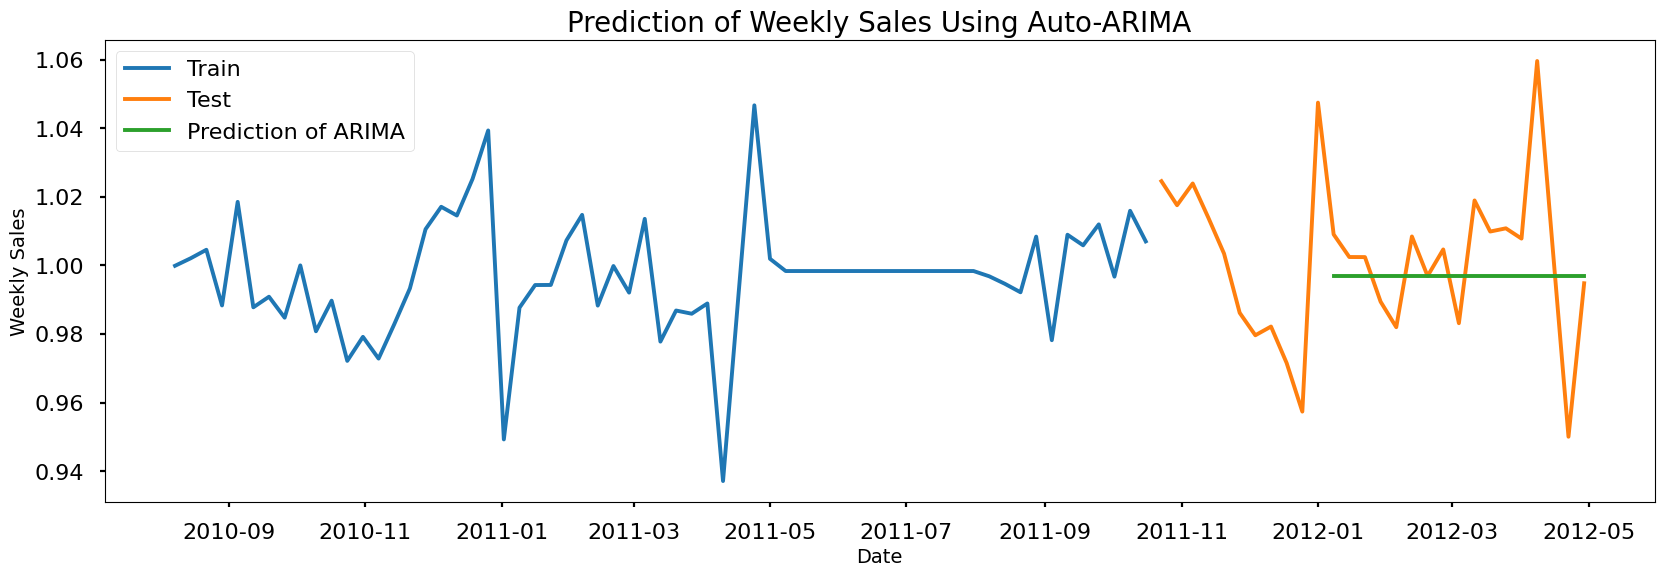

In [189]:
y_pred = model_auto_arima.predict(n_periods=len(test_residual))
y_pred = pd.DataFrame(y_pred,index = test_data.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales Using Auto-ARIMA', fontsize=20)
plt.plot(train_residual, label='Train')
plt.plot(test_residual, label='Test')
plt.plot(y_pred, label='Prediction of ARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()



ExponentialSmoothing

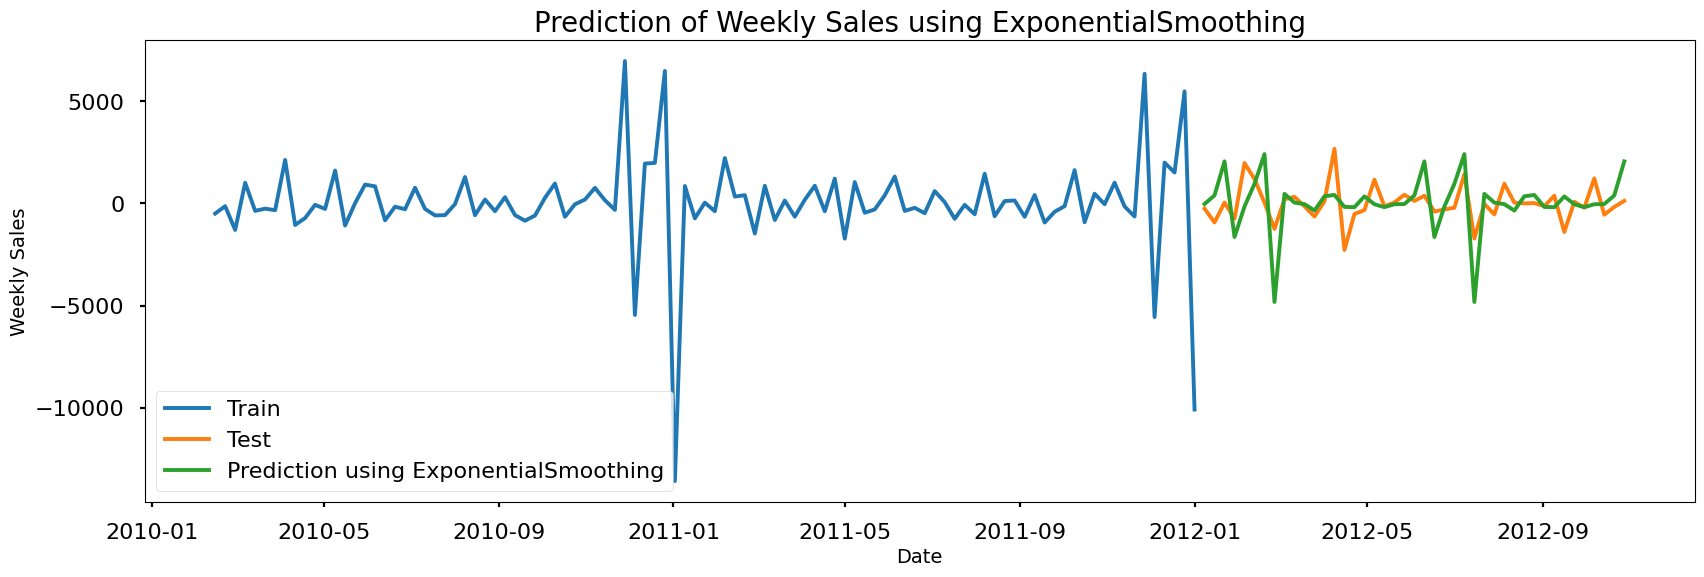

In [176]:
model_holt_winters = ExponentialSmoothing(train_data_diff, seasonal_periods=20, seasonal='additive',
                                           trend='additive',damped=True).fit() #Taking additive trend and seasonality.
y_pred = model_holt_winters.forecast(len(test_data_diff))# Predict the test data

#Visualize train, test and predicted data.
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using ExponentialSmoothing', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction using ExponentialSmoothing')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()